In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import get_cmap


from scipy.spatial.distance import cdist




In [3]:
src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir

from analysis.density import cdf_dist_arrid_vec

In [4]:
(np.sqrt(5)-1.0)/2.0

0.6180339887498949

# Select parameters

In [5]:
path_read = os.path.join(src_dir,os.pardir,'data_filter')
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)
arr_pd =  np.load(filename)


In [6]:
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arr_pd)
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std

In [7]:
## cluster-positions as described in paper

c_names = ['Average','Self-centered','Reserved',' Role Model']
arr_cd_dom = np.zeros((4,5))
arr_cd_dom[0,:] = np.array([ 0.55,0.51,-0.60,0.25,0.25 ])
arr_cd_dom[1,:] = np.array([ -0.23,0.70,-0.75,-0.56,-0.44 ])
arr_cd_dom[2,:] = np.array([ -0.54,-0.07,-0.77,0.12,0.19 ])
arr_cd_dom[3,:] = np.array([ -0.70,0.52,0.23,0.62,0.78 ])

In [8]:

arr_d = np.linspace(0.25,3.0,51)


In [9]:
arr_d

array([0.25 , 0.305, 0.36 , 0.415, 0.47 , 0.525, 0.58 , 0.635, 0.69 ,
       0.745, 0.8  , 0.855, 0.91 , 0.965, 1.02 , 1.075, 1.13 , 1.185,
       1.24 , 1.295, 1.35 , 1.405, 1.46 , 1.515, 1.57 , 1.625, 1.68 ,
       1.735, 1.79 , 1.845, 1.9  , 1.955, 2.01 , 2.065, 2.12 , 2.175,
       2.23 , 2.285, 2.34 , 2.395, 2.45 , 2.505, 2.56 , 2.615, 2.67 ,
       2.725, 2.78 , 2.835, 2.89 , 2.945, 3.   ])

In [10]:
## get the fraction of people classified
## distance of each person to each cluster

S = cdist(arr_pd,arr_cd_dom)
N = len(S)

arr_p_class = 0.0*arr_d
arr_p_class_unique = 0.0*arr_d
for i_d,d in enumerate(arr_d):

    ind_sel = np.where( np.min(S,axis=1)<=d )[0]
    n_class = len(ind_sel)
    p_class = n_class/N


    n_unique = 0
    p_unique_class = 0.0
    for i_u in ind_sel:
        S_u = np.sort(S[i_u])
        if S_u[1] > d:
            n_unique += 1
            
    if n_class > 0:
        p_unique_class = n_unique/n_class
    else:
        p_unique_class = np.nan
        
        
    
    arr_p_class[i_d] = p_class
    arr_p_class_unique[i_d] = p_unique_class

In [17]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 246  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/1.8# Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
#           'text.fontsize': Ampl*10,
          'legend.fontsize': Ampl*8,
          'xtick.labelsize': Ampl*10,
          'ytick.labelsize': Ampl*10,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False

         }
plt.rcParams.update(params)

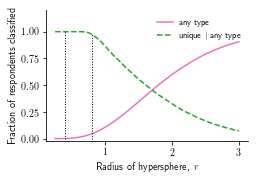

In [21]:
cmap = get_cmap('tab10')


## cumulative distribution of fraction of ponts with distance <= x
## true data and randomized data
n_std = 2

f = plt.figure()
plt.clf()
ax = f.add_subplot(111)

c = cmap(6)
ax.plot(arr_d,arr_p_class, label = 'any type',c=c)
c = cmap(2)

ax.plot(arr_d,arr_p_class_unique, label = 'unique $\mid$ any type',c=c, ls='--')

ax.plot([0.4,0.4],[0,1],ls=':',color='black',lw=1)
ax.plot([0.8,0.8],[0,.975],ls=':',color='black',lw=1)

ax.set_xlabel('Radius of hypersphere, $r$')
ax.set_ylabel('Fraction of respondents classified')
ax.legend(loc='upper right',frameon=False)
ax.set_ylim(-0.02,1.2)

plt.subplots_adjust(bottom=0.175,wspace=0.4,left=0.15)

path_save = '../figures/'
fname_save = 'commentary-freudenstein_fig-c-fraction-of-people-classified.png'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename,dpi=300)